# Binary Classification with Bank Churn Dataset.
## This is a kaggle playground competition to improve machine learning and data science skills. Link to the competition can be found [here](https://www.kaggle.com/competitions/playground-series-s4e1/overview)


## Importing Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import seaborn as sns
pd.options.mode.copy_on_write = True

## Data description && EDA

* **Customer ID:** A unique identifier for each customer
* **Surname:** The customer's surname or last name
* **Credit Score:** A numerical value representing the customer's credit score
* **Geography:** The country where the customer resides (France, Spain or Germany)
* **Gender:** The customer's gender (Male or Female)
* **Age:** The customer's age.
* **Tenure:** The number of years the customer has been with the bank
* **Balance:** The customer's account balance
* **NumOfProducts:** The number of bank products the customer uses (e.g., savings account, credit card)
* **HasCrCard:** Whether the customer has a credit card (1 = yes, 0 = no)
* **IsActiveMember:** Whether the customer is an active member (1 = yes, 0 = no)
* **EstimatedSalary:** The estimated salary of the customer
* **Exited:** Whether the customer has churned (1 = yes, 0 = no)

In [2]:
train_data = pd.read_csv("../data/bank_churn_competition/train.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [3]:
columns_to_drop = ["Exited", "id", "Surname", "CustomerId"]
relevant_feature_columns = [column for column in list(train_data.columns) if column not in columns_to_drop]
target_column = ["Exited"]

In [18]:
for column in relevant_feature_columns:
    data = train_data[column]
    if data.dtype == "float64" or data.dtype == "int64": 
            print(f"{column}:\nMax: {data.max():.2f}\n"
                  f"Min: {data.min():.2f}\n"
                  f"Mean: {data.mean():.3f}"
                  f"\nMedian {data.median():.3f}")
            print("----------\n")

CreditScore:
Max: 850.00
Min: 350.00
Mean: 656.454
Median 659.000
----------

Age:
Max: 92.00
Min: 18.00
Mean: 38.126
Median 37.000
----------

Tenure:
Max: 10.00
Min: 0.00
Mean: 5.020
Median 5.000
----------

Balance:
Max: 250898.09
Min: 0.00
Mean: 55478.087
Median 0.000
----------

NumOfProducts:
Max: 4.00
Min: 1.00
Mean: 1.554
Median 2.000
----------

HasCrCard:
Max: 1.00
Min: 0.00
Mean: 0.754
Median 1.000
----------

IsActiveMember:
Max: 1.00
Min: 0.00
Mean: 0.498
Median 0.000
----------

EstimatedSalary:
Max: 199992.48
Min: 11.58
Mean: 112574.823
Median 117948.000
----------


* Feature columns seem to be normally distributed. Mean and Median for each column are very close. 

### Examining correlation between feature columns and target output. 

In [19]:
correlation = train_data[relevant_feature_columns + target_column]

In [20]:
encoder = LabelEncoder()
output = encoder.fit_transform(train_data["Geography"])
correlation["Geography"] = output

In [21]:
age_encoder = LabelEncoder()
gender_output = encoder.fit_transform(correlation["Gender"])
correlation["Gender"]  = gender_output

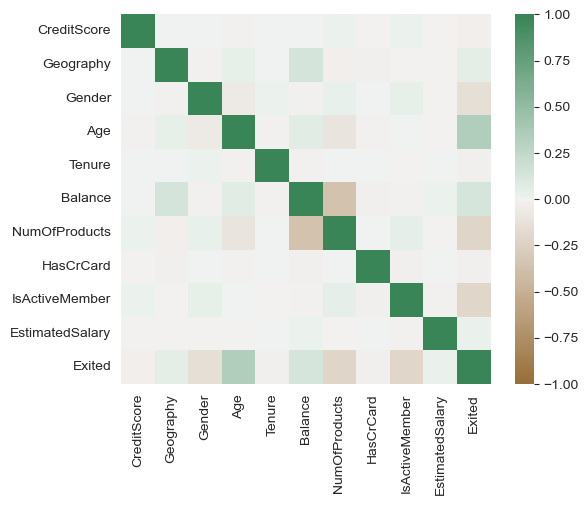

In [9]:
correlation_full_health = correlation.corr()

axis_corr = sns.heatmap(
    correlation_full_health,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(50, 500, n=500),
    square=True
)

plt.show()

In [10]:
for column in correlation.columns:
    if column != "Exited":
        print(f"{column}:\nCorrelation with target: {correlation[column].corr(correlation['Exited'])}\n\n")

CreditScore:
Correlation with target: -0.02738260006165168


Geography:
Correlation with target: 0.05334343123704925


Gender:
Correlation with target: -0.1464415589539307


Age:
Correlation with target: 0.3407681634075804


Tenure:
Correlation with target: -0.019564844484077474


Balance:
Correlation with target: 0.12974286048401104


NumOfProducts:
Correlation with target: -0.21455423158490433


HasCrCard:
Correlation with target: -0.02214133307230682


IsActiveMember:
Correlation with target: -0.2102370257921375


EstimatedSalary:
Correlation with target: 0.01882680567081288


In [16]:
for column in list(correlation.columns):
    print(f"{column}: {correlation[column].dtypes}")

CreditScore: int64
Geography: int64
Gender: int64
Age: float64
Tenure: int64
Balance: float64
NumOfProducts: int64
HasCrCard: float64
IsActiveMember: float64
EstimatedSalary: float64
Exited: int64
